## Dataset from: https://www.gmp.police.uk/police-forces/greater-manchester-police/areas/greater-manchester-force-content/sd/stats-and-data/hate-crime/

In [298]:
import pandas as pd
import matplotlib.pyplot as plt

In [299]:
df = pd.read_csv("hate-crime-gmp-CSV.csv")
df

,Unnamed: 0,01/01/2010,01/02/2010,01/03/2010,01/04/2010,01/05/2010,01/06/2010,01/07/2010,01/08/2010,01/09/2010,...,01/12/2030,01/01/2031,01/02/2031,01/03/2031,01/04/2031,01/05/2031,01/06/2031,01/07/2031,01/08/2031,01/09/2031
0,NaN,31/01/2010,28/02/2010,31/03/2010,30/04/2010,31/05/2010,30/06/2010,31/07/2010,31/08/2010,30/09/2010,...,31/12/2030,31/01/2031,28/02/2031,31/03/2031,30/04/2031,31/05/2031,30/06/2031,31/07/2031,31/08/2031,30/09/2031
1,Recorded hate crime counts,Jan-2010,Feb-2010,Mar-2010,Apr-2010,May-2010,Jun-2010,Jul-2010,Aug-2010,Sep-2010,...,Dec-2030,Jan-2031,Feb-2031,Mar-2031,Apr-2031,May-2031,Jun-2031,Jul-2031,Aug-2031,Sep-2031
2,GMP,304,309,337,338,319,465,332,323,298,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,City of Manchester North,22,23,25,24,17,30,32,33,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,City of Manchester Central,26,40,25,40,32,52,39,22,36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Bury,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Rochdale,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Oldham,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,Manchester Airport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [300]:
df.drop(0,inplace=True) # remove the first NaN row
totalCrimes_df = df[:16] # only the first 16 rows are needed
totalCrimes_df.dropna(axis=1,inplace=True) # Drop all NaN columns 
totalCrimes_df.reset_index(drop=True,inplace=True) # Correct the index

# Set new header
new_header = totalCrimes_df.iloc[0]
totalCrimes_df = totalCrimes_df[1:]
totalCrimes_df.columns = new_header

# Set new indexes
totalCrimes_df.set_index("Recorded hate crime counts",inplace=True)
totalCrimes_df.replace(',','',regex=True, inplace=True) # Remove the commas from values > 999
totalCrimes_df= totalCrimes_df.apply(pd.to_numeric)  # Convert all values to integers

C:\Users\manoj\AppData\Local\Temp\ipykernel_38436\983181658.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalCrimes_df.dropna(axis=1,inplace=True) # Drop all NaN columns


In [301]:
totalCrimes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, GMP to No beat code
Columns: 188 entries, Jan-2010 to Aug-2025
dtypes: int64(188)
memory usage: 22.1+ KB


In [302]:
firstTwelve_df = totalCrimes_df.iloc[0,:12]
firstTwelve_df

0
Jan-2010    304
Feb-2010    309
Mar-2010    337
Apr-2010    338
May-2010    319
Jun-2010    465
Jul-2010    332
Aug-2010    323
Sep-2010    298
Oct-2010    322
Nov-2010    276
Dec-2010    257
Name: GMP, dtype: int64

In [270]:
int(firstTwelve_df.min())

257

# Let's visualise this data as a time series!

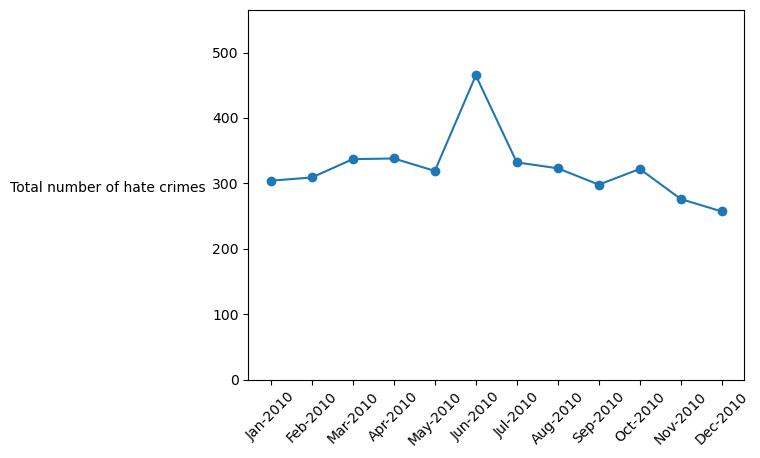

In [315]:

plt.plot(firstTwelve_df.index, firstTwelve_df,marker="o")
plt.ylim(0, firstTwelve_df.max()+100)
plt.ylabel("Total number of hate crimes",rotation="horizontal",labelpad = 75)
plt.xticks(rotation=45)
plt.show()